In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

## RESULTS USING THE SIGNAL OF DONE

In [27]:
env='Walker2d-v4'
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data_using_done/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMPER"
print(df_comper.shape)

(5065, 17)


In [28]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data_using_done/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
print(df_ddpg.shape)

(12296, 17)


In [29]:
df_comper.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Walker2d-v4,25-09-2023 22:46:09,28,0,28,0.001392,1,29,True,1.583685,1.583685,1.583685,1.583685,1.583685,COMPER
1,1,2,Walker2d-v4,25-09-2023 22:46:42,44,0,44,0.002187,2,17,True,-10.873248,-4.644782,-4.644782,-4.644782,-4.644782,COMPER
2,1,3,Walker2d-v4,25-09-2023 22:47:52,72,0,72,0.003579,3,29,True,-7.205723,-5.498429,-5.498429,-5.498429,-5.498429,COMPER
3,1,4,Walker2d-v4,25-09-2023 22:50:30,135,0,135,0.006710,4,64,True,-4.107693,-5.150745,-5.150745,-5.150745,-5.150745,COMPER
4,1,5,Walker2d-v4,25-09-2023 22:52:17,177,0,177,0.008798,5,43,True,2.905206,-3.539555,-3.539555,-3.539555,-3.539555,COMPER


In [30]:
df_ddpg.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Walker2d-v4,04-10-2023 14:49:39,22,23,0,0.001093,1,23,True,9.695140,9.695140,9.695140,9.695140,9.695140,DDPG
1,1,2,Walker2d-v4,04-10-2023 14:49:41,34,35,0,0.001690,2,13,True,-0.307138,4.694001,4.694001,4.694001,4.694001,DDPG
2,1,3,Walker2d-v4,04-10-2023 14:49:42,47,48,0,0.002336,3,14,True,-2.932277,2.151908,2.151908,2.151908,2.151908,DDPG
3,1,4,Walker2d-v4,04-10-2023 14:49:44,59,60,0,0.002933,4,13,True,-1.289959,1.291441,1.291441,1.291441,1.291441,DDPG
4,1,5,Walker2d-v4,04-10-2023 14:49:45,70,71,0,0.003479,5,12,True,-0.337276,0.965698,0.965698,0.965698,0.965698,DDPG


In [31]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Walker2d-v4,25-09-2023 22:46:09,28,0,28,0.001392,1,29,True,1.583685,1.583685,1.583685,1.583685,1.583685,COMPER
1,1,2,Walker2d-v4,25-09-2023 22:46:42,44,0,44,0.002187,2,17,True,-10.873248,-4.644782,-4.644782,-4.644782,-4.644782,COMPER
2,1,3,Walker2d-v4,25-09-2023 22:47:52,72,0,72,0.003579,3,29,True,-7.205723,-5.498429,-5.498429,-5.498429,-5.498429,COMPER
3,1,4,Walker2d-v4,25-09-2023 22:50:30,135,0,135,0.006710,4,64,True,-4.107693,-5.150745,-5.150745,-5.150745,-5.150745,COMPER
4,1,5,Walker2d-v4,25-09-2023 22:52:17,177,0,177,0.008798,5,43,True,2.905206,-3.539555,-3.539555,-3.539555,-3.539555,COMPER


In [32]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
1754,5,1755,Walker2d-v4,05-10-2023 02:36:59,49600,45598,0,0.999,1512,110,False,104.751839,27.212435,136.866983,115.798715,174.240461,DDPG
1755,5,1756,Walker2d-v4,05-10-2023 02:37:35,49762,45760,0,0.999,1512,272,True,190.398313,27.305365,134.341605,113.372697,191.639248,DDPG
1756,5,1757,Walker2d-v4,05-10-2023 02:37:44,49800,45798,0,0.999,1513,39,False,35.122091,27.309814,134.198368,113.892070,193.593716,DDPG
1757,5,1758,Walker2d-v4,05-10-2023 02:38:17,49952,45950,0,0.999,1513,191,True,106.943760,27.355112,131.757721,114.741076,194.299337,DDPG
1758,5,1759,Walker2d-v4,05-10-2023 02:38:27,50000,45987,0,0.999,1514,49,True,51.658197,27.368929,131.403891,114.524849,184.345553,DDPG


<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

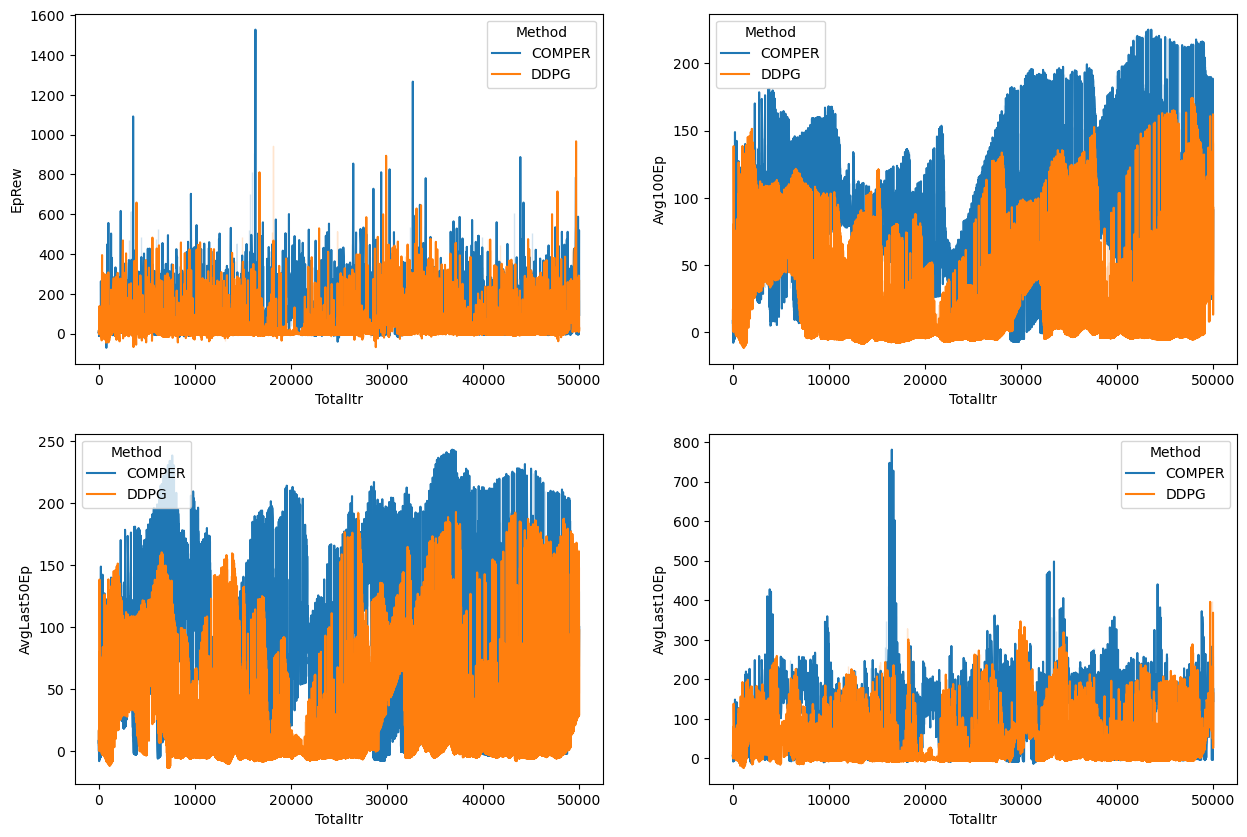

In [33]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])

In [34]:
path ='COMPER_DDPG/data_using_done/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMPER"
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,26-09-2023 02:20:28,Walker2d-v4,5000,5.951114,COMPER
1,1,26-09-2023 05:56:10,Walker2d-v4,10000,6.301192,COMPER
2,1,26-09-2023 09:31:55,Walker2d-v4,15000,3.303908,COMPER
3,1,26-09-2023 13:09:04,Walker2d-v4,20000,6.004303,COMPER
4,1,26-09-2023 16:44:44,Walker2d-v4,25000,6.020003,COMPER


In [35]:
path ='DPPG/data_using_done/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,04-10-2023 15:00:28,Walker2d-v4,5000,5.300290,DDPG
1,1,04-10-2023 15:11:16,Walker2d-v4,10000,5.697243,DDPG
2,1,04-10-2023 15:23:01,Walker2d-v4,15000,-1.311278,DDPG
3,1,04-10-2023 15:35:45,Walker2d-v4,20000,5.149952,DDPG
4,1,04-10-2023 15:49:25,Walker2d-v4,25000,5.889766,DDPG


In [36]:
df_ddpg_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,4.130963
std,1.428571,14507.211437,2.634045
min,1.000000,5000.000000,-2.887543
25%,2.000000,15000.000000,3.019349
50%,3.000000,27500.000000,5.357014
75%,4.000000,40000.000000,6.038896
max,5.000000,50000.000000,6.362893


In [37]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])
df_eval.rename(columns = {'Int':'Itr'}, inplace = True)

<Axes: xlabel='Itr', ylabel='EvalAvgRew'>

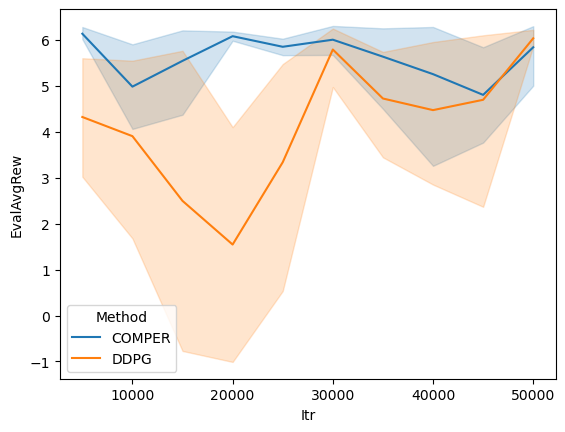

In [38]:
sns.lineplot(data=df_eval, x="Itr", y="EvalAvgRew",hue='Method')

## USING ROLLING AVERAGE

In [39]:
df_comper_rolling_avg = pd.DataFrame(df_comper[["TotalItr","EpRew","Method"]])
df_comper_rolling_avg["EpRewRolling"]=df_comper_rolling_avg['EpRew'].rolling(100).mean()
df_comper_rolling_avg.dropna(inplace=True)
df_comper_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,6073,-6.955440,COMPER,94.387481
100,6079,-6.684623,COMPER,94.304798
101,6085,-6.617200,COMPER,94.347358
102,6091,-6.623726,COMPER,94.353178
103,6097,-5.525213,COMPER,94.339003


In [40]:
df_ddpg_rolling_avg=pd.DataFrame(df_ddpg[["TotalItr","EpRew","Method"]])
df_ddpg_rolling_avg["EpRewRolling"]=df_ddpg_rolling_avg["EpRew"].rolling(100).mean()
df_ddpg_rolling_avg.dropna(inplace=True)
df_ddpg_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,5500,5.088862,DDPG,58.809652
100,5524,6.074460,DDPG,58.773445
101,5549,7.928866,DDPG,58.855805
102,5573,6.053823,DDPG,58.945666
103,5600,7.959422,DDPG,59.038160


In [41]:
df_rolling=pd.concat([df_comper_rolling_avg,df_ddpg_rolling_avg])
df_rolling.head()

,TotalItr,EpRew,Method,EpRewRolling
99,6073,-6.955440,COMPER,94.387481
100,6079,-6.684623,COMPER,94.304798
101,6085,-6.617200,COMPER,94.347358
102,6091,-6.623726,COMPER,94.353178
103,6097,-5.525213,COMPER,94.339003


In [42]:
df_rolling.tail()

,TotalItr,EpRew,Method,EpRewRolling
1754,49600,104.751839,DDPG,136.866983
1755,49762,190.398313,DDPG,134.341605
1756,49800,35.122091,DDPG,134.198368
1757,49952,106.943760,DDPG,131.757721
1758,50000,51.658197,DDPG,131.403891


<Axes: xlabel='TotalItr', ylabel='EpRewRolling'>

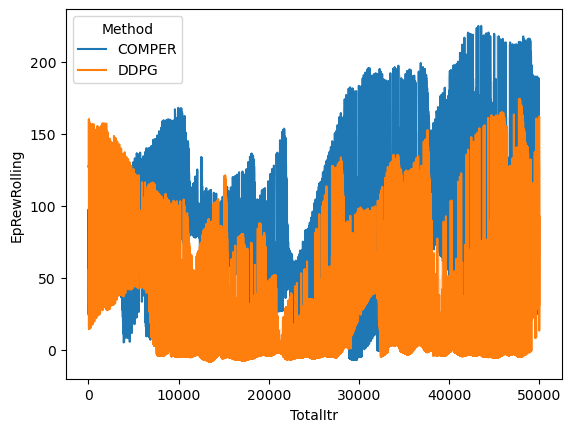

In [43]:
fig = plt.Figure()
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df_rolling, x="TotalItr", y="EpRewRolling",hue='Method')

In [44]:
df_comper_eval_rolling_avg = pd.DataFrame(df_comper_eval[["Int","EvalAvgRew","Method"]])
df_comper_eval_rolling_avg["EpRewRolling"]=df_comper_eval["EvalAvgRew"].rolling(2).mean()
df_comper_eval_rolling_avg.dropna(inplace=True)
df_comper_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,6.301192,COMPER,6.126153
2,15000,3.303908,COMPER,4.802550
3,20000,6.004303,COMPER,4.654105
4,25000,6.020003,COMPER,6.012153
5,30000,6.079608,COMPER,6.049806


In [45]:
df_ddpg_eval_rolling_avg = pd.DataFrame(df_ddpg_eval[["Int","EvalAvgRew","Method"]])
df_ddpg_eval_rolling_avg["EpRewRolling"]=df_ddpg_eval["EvalAvgRew"].rolling(2).mean()
df_ddpg_eval_rolling_avg.dropna(inplace=True)
df_ddpg_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,5.697243,DDPG,5.498766
2,15000,-1.311278,DDPG,2.192982
3,20000,5.149952,DDPG,1.919337
4,25000,5.889766,DDPG,5.519859
5,30000,6.227790,DDPG,6.058778


<Axes: xlabel='Int', ylabel='EpRewRolling'>

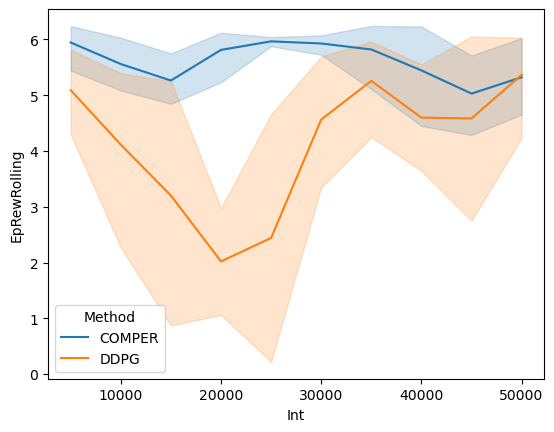

In [46]:
df_eval_rolling=pd.concat([df_comper_eval_rolling_avg,df_ddpg_eval_rolling_avg])
sns.lineplot(data=df_eval_rolling, x="Int", y="EpRewRolling",hue='Method')

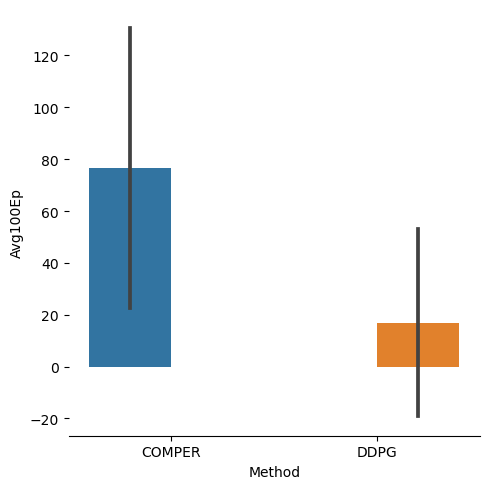

In [47]:
g = sns.catplot(data=df, kind="bar",x="Method", y="Avg100Ep", hue="Method",
    errorbar="sd")
g.despine(left=True)

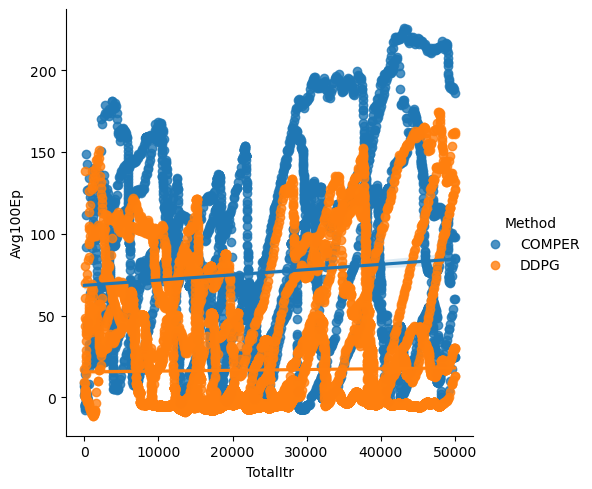

In [48]:
g = sns.lmplot(
    data=df,
    x="TotalItr", y="Avg100Ep", hue="Method",
    height=5
)